# Capstone Mini-Project: Exploratory Data Analysis & Storytelling
- Exploratory Data Analysis of Airbnb Dataset
<br>
- Author: Ashley Jiangyang

# Table of Contents
1. [Introduction and Project Goals](#Intro)
2. [Question of Interest](#Quest) <br>
3. [Exploratory Data Analysis](#EDA)<br>
    3.1 [Yield](#Yd)<br>
    3.2 [Host Activeness On The Platform](#Ha)<br>
    3.3 [Listings Accommodate & Facilities](#Laf)<br>
    3.4 [Interavtive Relationshiop](#Ir)<br>
    3.5 [Geographical Information](#Gi)<br>
4. [Summary](#sum)

# 1. Introduction
<a id="Intro"></a> 

> __Background__
<br>
Airbnb is a popular home-sharing platform enabling home-owners ('hosts') all over the world to share their accommodation ('listings') with the guests, guests can book through Airbnb and stay in them. For potential hosts, this could be a profitable option to list their empty vacation homes or spare rooms. And home-owners even turn their properties into Airbnb hosting exclusively to earn money.
As far as we all know, whether an Airbnb listing can attract the customer and gain profits is determined by many factors, it's price, the seasonality, the attribute of the house, and the local marketing, etc.. and if taking the variance of many perspectives, it's even harder to know whether the listing can make profits both in the short-term and the long-term.
<br/><br/>
__Goals__
<br>
This project aims to take advantage of the previously cleaned Airbnb Seattle dataset, to leverage the insights of the Seattle Airbnb marketing as well as answer the key question - for hosts, how to maximize their earning? To perform exploratory data analysis on the tidying data set will reveal what features influence the listings yields. Data visualization, the statistical summary will be applied to the data.
<br/><br/>
> __Motivations__
<br/>
Answering the question would be a benefit for both potential hosts and any home-sharing platform, that info will be very useful guidance to make the investment as well as regulate the listings market. 
<br/><br/>
We will also be exploring related features to be considered in the modeling.
<br/><br/>
Data Source: https://www.kaggle.com/airbnb/seattle#listings.csv
<br>
Reference: http://insideairbnb.com/about.html

# 2. Question of Interest
<a id="Quest"></a> 

> to initial the data storytelling journey, we will organize this notebook around the following questions of interest:
<br>
1. What's the global trend for the host activity over all the data? does it influence the yield?
2. Is there a difference in time for activating the listing on the platform? Does it influence the yield?
3. Does the calculated hosting count influence the yield?
4. How about the rating score? will the group with higher rating scores have a higher yield overall?
5. Previously we extract the top popular amenities, are they related to higher yield? what are top important about influencer among them?
6. How about the geographical location? dose the popular district gain better earning than others?
<br/>

Now let's start to explore the data.

# 3. Exploratory Data Analysis
<a id="EDA"></a> 
<br>
For this section, we will peform the explore the data on the features that we are most interested in.

In [176]:
# Import packages

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns   
from scipy import stats
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

In [177]:
# Import the data
listings_eda = pd.read_csv("listings_clean_EDA.csv") 

## 3.1 `Yield`<a id="Yd"></a> 
What does the yield look like? let's dive into our target feature of interest at first.

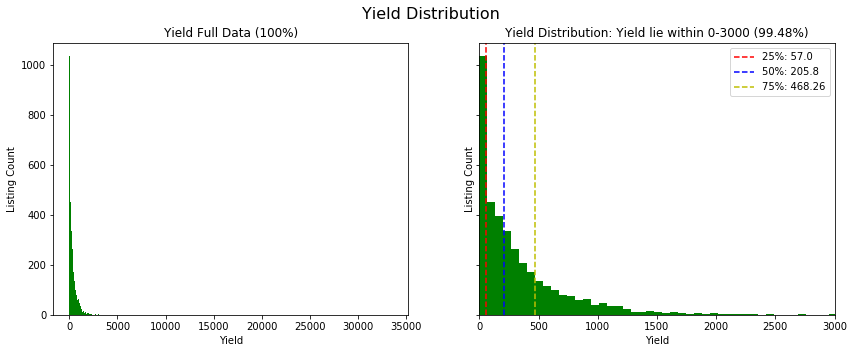

In [178]:
# calculate the percentile
Less_3K_n = len(listings_eda[listings_eda['yield'] <= 3000]['yield'])
n = len(listings_eda['yield'])

p_25 = round(np.percentile(listings_eda['yield'], 25), 2)
p_50 = round(np.percentile(listings_eda['yield'], 50), 2)
p_75 = round(np.percentile(listings_eda['yield'], 75), 2)

# initial plot
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=False, figsize=(14,5))

fig.suptitle('Yield Distribution', fontsize=16)
# We can set the number of bins with the `bins` kwarg
axs[0].hist(listings_eda['yield'] , bins = 500 , color = 'green' )
axs[1].hist(listings_eda['yield'] , bins = 500 , color = 'green' )

# limit the data to show inner struture
axs[1].set_xlim([0, 3000])

# add title and label
axs[0].set_title('Yield Full Data (100%)')
axs[0].set_xlabel('Yield')
axs[0].set_ylabel('Listing Count')

axs[1].set_title("Yield Distribution: Yield lie within 0-3000 ({:.2%})".format(Less_3K_n/n))
axs[1].set_xlabel('Yield')
axs[1].set_ylabel('Listing Count')
axs[1].axvline(p_25, color = "r", linestyle='--', label='25%: {}'.format(p_25))
axs[1].axvline(p_50, color = "b", linestyle='--', label='50%: {}'.format(p_50))
axs[1].axvline(p_75, color = "y", linestyle='--', label='75%: {}'.format(p_75))

# add legend
legend = axs[1].legend(loc='upper right')

# show plot
plt.show()

In [179]:
# description
print("Yield Statistics: \n{}".format(listings_eda['yield'].describe()))
print()

print("Yield Median: {:.2f}".format(np.median(listings_eda['yield'])))
# some important values
equal_to_zero_n = len(listings_eda[listings_eda['yield'] == 0]['yield'])
within_p_50_n = len(listings_eda[listings_eda['yield'] <= p_50]['yield'])
greater_3K = len(listings_eda[listings_eda['yield'] > 3000]['yield'])
print("Yield Percentile of 0: {:.2%}".format(equal_to_zero_n/n))
print("Yield Percentile within P_50 (206): {:.2%}".format(within_p_50_n/n))
print("Yield Percentile greater than 3,000: {:.2%}".format(greater_3K/n))
print()
# print extreme value
print("Yield values greater than 3,000: \n{}".format(listings_eda[listings_eda['yield'] > 3000]['yield'].sort_values()))


Yield Statistics: 
count     3818.000000
mean       367.938895
std        798.393684
min          0.000000
25%         57.000000
50%        205.800000
75%        468.262500
max      33605.550000
Name: yield, dtype: float64

Yield Median: 205.80
Yield Percentile of 0: 16.42%
Yield Percentile within P_50 (206): 50.03%
Yield Percentile greater than 3,000: 0.52%

Yield values greater than 3,000: 
186      3012.10
3636     3033.00
1138     3069.00
1230     3150.00
2518     3285.00
3165     3454.64
1660     3614.00
14       3664.95
813      3875.00
2        4485.00
1540     4777.50
3753     4988.00
1070     5848.50
2892     6435.52
3598     6513.60
1631     7161.28
1537     9332.40
1519    10489.40
1500    16660.00
2107    33605.55
Name: yield, dtype: float64


## Yield Summary

>Now we have combined both plot and the statistic summary for our target feature `yield`:
<br/>  - It looks like our data is highly right-skewed, we have lots of extreme values, some even up to 69,000,
<br>  - The mean is about 385 and the 50 percentile is 205, our mean is shifting towards the right outweighed by these extreme values,
<br>  - 16.42% of the yield is zero! which means no active booking on the platform if all the scrapped data are trustworthy. Why are these happening? we may want to dive into other features regarding the host activeness on this platform then.


## 3.2 `Host Activeness On The Platform`
<a id="Ha"></a> 
<br> We have checked the `yield` above, now we wonder is the host activeness have something to do with the potential
yield pattern, we will start from several time-related features here.


__Global Trend for Host__

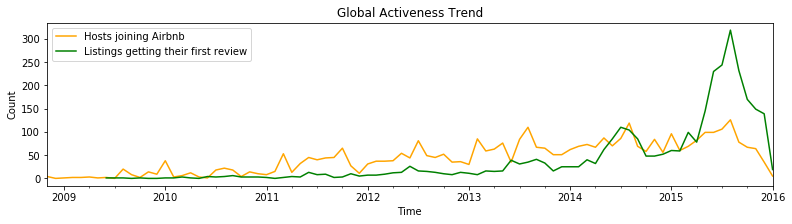

In [180]:
# convert the time features
listings_eda['host_since'] = pd.to_datetime(listings_eda['host_since'], format = '%Y/%m/%d')
listings_eda['first_review'] = pd.to_datetime(listings_eda['first_review'], format = '%Y/%m/%d')

# plot the results
plt.figure(figsize=(13,3))
listings_eda.set_index('host_since').resample('MS').size().plot(label='Hosts joining Airbnb', color='orange')
listings_eda.set_index('first_review').resample('MS').size().plot(label='Listings getting their first review', color='green')
plt.title('Global Activeness Trend')
plt.legend()
plt.xlim('2008-11-01', '2016-01-10') # Limiting to minimum and maximum study window
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

>>Let's take a look at the global market for the host. 
- The data shows from the year 2009 to 2016, there is a steady increasing trend for both the hosts joining Airbnb and listing getting their first review over these years;
- There is a small boost around 2015-2016, that may be caused by business event or campaign, or the tourism trend of local Seattle, or it could be Airbnb gain its popularity, more people are putting their properties on the platform;
- we see a zig-zag trend for both curves, showing a mix of seasonality and event effect.

__1. Global Trend for Yield, price, review_per_month__

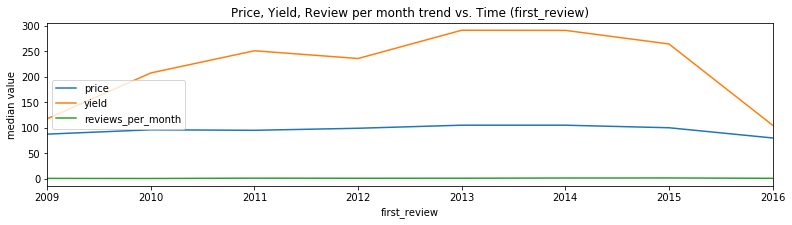

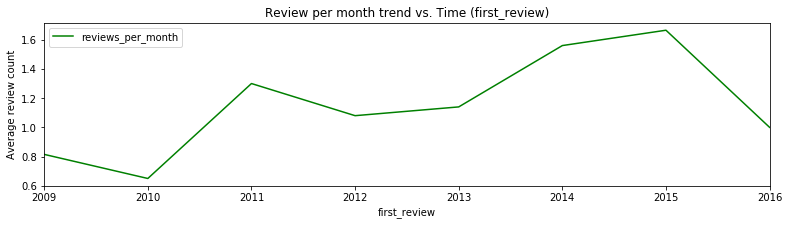

In [181]:
# Get target features
dt_first_review = listings_eda.loc[:,['first_review','price', 'reviews_per_month','yield'] ].copy()
# Drop null of index
dt_first_review = dt_first_review[dt_first_review.first_review.notnull()]   
# set index
dt_first_review.set_index(dt_first_review.first_review, inplace = True)
# Data to plot
dt_yield = pd.DataFrame(dt_first_review[['yield', 'price', 'reviews_per_month']])

# Plot Resamplimg data
dt_yield[['price','yield', 'reviews_per_month']].resample("Y").median().plot(subplots=False, figsize=(13,3))
plt.ylabel('median value')
plt.title('Price, Yield, Review per month trend vs. Time (first_review)')

dt_yield[['reviews_per_month']].resample("Y").median().plot(subplots=False, figsize=(13,3),color = 'green')
plt.ylabel('Average review count')
plt.title('Review per month trend vs. Time (first_review)')
plt.show()

>> We smooth out the noise by getting the yearly resampling mean for `yield`, `price` and `review_per_month`. 
- However, the median value does not show a remarkable increase over these years. 
- For `review_per_month`, we have the extra plot to zoom in to see the variation more closely. The overall plot indicates the increasing average month review count from 2010 - 2015 whereas there is obvious drop from 2015 - 2016.
- Our yield feature was constructed by the price and yield, the overall trend shows is increasing, and the drop from 2015 - 2016 may cause by taking the review per month into account. 

__2. Active Time & From Last Active__
<br>
Remember that we have two calculated feature `first_review_since_host` and `last_review_month` - which indicates the ability to attract the customer and the survival ability to the latest time point.  

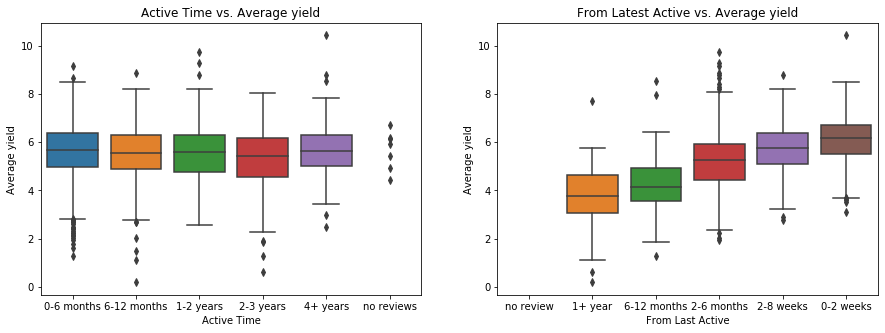

Active Time Summary:
              count        mean          std
0-6 months   1239.0  438.653721   532.558638
1-2 years     675.0  465.252993   897.724999
2-3 years     644.0  367.995637   407.791035
4+ years      169.0  661.085917  2645.567819
6-12 months   457.0  428.819190   557.927847
no reviews    634.0    4.053454    45.543607

Last Active summary:
              count        mean          std
0-2 weeks     793.0  642.812799  1271.280061
1+ year        83.0   94.491928   241.785077
2-6 months   1098.0  352.413953   815.284156
2-8 weeks    1092.0  440.118965   453.350348
6-12 months   125.0  157.095120   511.048210
no reviews    627.0    0.000000     0.000000


In [182]:
from numpy import median
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x="first_review_since_host", y=np.log(listings_eda['yield']), 
            data=listings_eda, ax=axes[0], 
            order = ['0-6 months', '6-12 months', '1-2 years', '2-3 years', '4+ years', 'no reviews'])
axes[0].set_title('Active Time vs. Average yield')
axes[0].set_xlabel('Active Time')
axes[0].set_ylabel('Average yield')

sns.boxplot(x="last_review_month", y=np.log(listings_eda['yield']), 
            data=listings_eda, ax=axes[1],
            order = ['no review', '1+ year', '6-12 months', '2-6 months', '2-8 weeks', '0-2 weeks'])
axes[1].set_title('From Latest Active vs. Average yield')
axes[1].set_xlabel('From Last Active')
axes[1].set_ylabel('Average yield')
plt.show()

host_activeness = listings_eda[['first_review_since_host', 'last_review_month', 'yield']]

active_time_summary = pd.DataFrame(group.describe().rename(columns={'yield':name}).squeeze()for name, group in host_activeness.groupby('first_review_since_host'))
last_active_summary = pd.DataFrame(group.describe().rename(columns={'yield':name}).squeeze()for name, group in host_activeness.groupby('last_review_month'))
print('Active Time Summary:\n{}'.format(active_time_summary.iloc[:,[0,1,2]]))
print()
print('Last Active summary:\n{}'.format(last_active_summary.iloc[:,[0,1,2]]))

>> __Active Time__: It seems that the attract of the customer quickly does not contribute to the yield much - four groups have a similar average yield whereas the 1-2 month group and 4+ years group do have a slightly higher yield. We may think that the group that whether the host can get the first review as fast as it might not be a good metric for potential earning - maybe a very potential good yield does not a reflection on the reviews they have.
<br><br/>
__From Last Active__: And for the survival ability - the trend is very obvious indicates that staying at the platform as much as you can, it'll help to get the higher yield.
<br><br/>
__No Review Group__: As what we've guessed before, the no review group barely has no yield.

__3. calculated_host_listings_count__
<br>
The listing count also indicates the activities of the hosts.

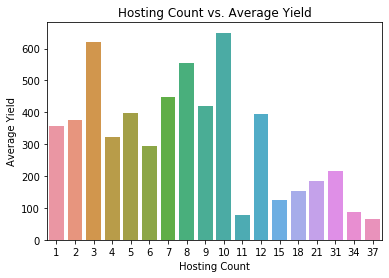

In [183]:
#group by host listing count
listings_count_yeild = listings_eda.groupby(["calculated_host_listings_count"])['yield'].aggregate(np.mean).reset_index().sort_values('yield',ascending = False)
sns.barplot(x='calculated_host_listings_count', y='yield', 
            data=listings_count_yeild)
plt.xlabel('Hosting Count')
plt.ylabel('Average Yield')
plt.title('Hosting Count vs. Average Yield')
plt.show()    

>> We aggregate the data at the `calculated_host_listings_count` level to see if listings count affects the average yield;
- The plot indicates in the range within 10 indicates best yield range, maybe these are managed by the professional agency;
- And the average yield is not that good for those with too much listings e.g. greater than 15, maybe these listings focus on over-expanding on the marketing but ignore what the customers really want - that does not contribute to earning as they expected.

__Host Active days__
<br> It appears that longer host active days suggests slightly better yield.

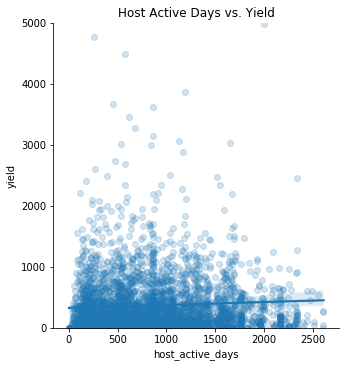

In [184]:
sns.lmplot(x='host_active_days', y='yield', data=listings_eda, fit_reg=True, scatter_kws={'alpha':0.2})
plt.ylim(0,5000)
plt.title('Host Active Days vs. Yield')
plt.show()

## Host Activeness Summary

>Now we have combined both plot and the statistic summary of `yield` for host activeness on the platform:
<br>  - It looks like the platform keeps attracting more host and customers at the later stage, which indicates it's a well-managed business and it gains its popularity overall;
<br>  - The individual yield trend are not that straightforward as we expected, we might assume there are a bunch of other underlying factors impact on the yield;
<br>  - The hosting count suggests a moderate amount of host of management relate to better yield;
<br>  - We are heading to the next section to explore more features then;
<br>  - Longer host active days suggests slightly better yield.

## 3.3 `Listings Accommodate & Facilities`
<a id="Laf"></a> 
<br> How does a listing's accommodate and facilities contribute to the yield? let's take a look!

__Accommodates__

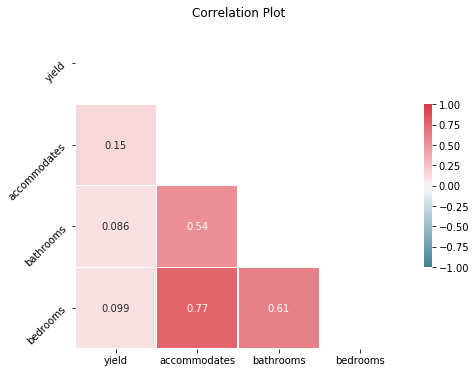

In [185]:
# set up data
acc_df = pd.DataFrame(listings_eda[['yield', 'accommodates', 'bathrooms', 'bedrooms']])
# Compute the correlation matrix
corr = acc_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.yticks(rotation=45) 
plt.title('Correlation Plot')
plt.show()

>> The `yield` seems to have a weak correlation with `accommodates`, `bathrooms` and `bedroom` whereas these features have a relatively high correlation with each other.

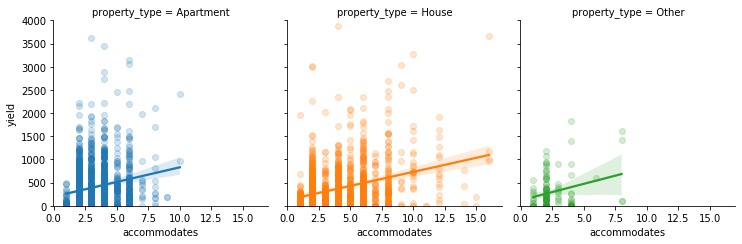

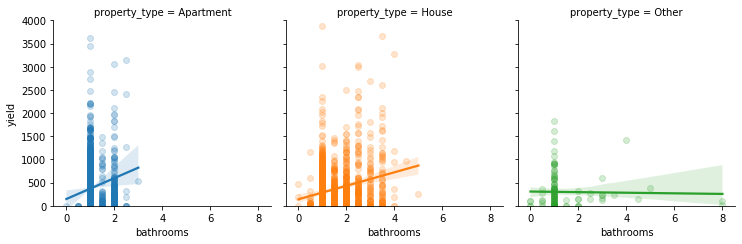

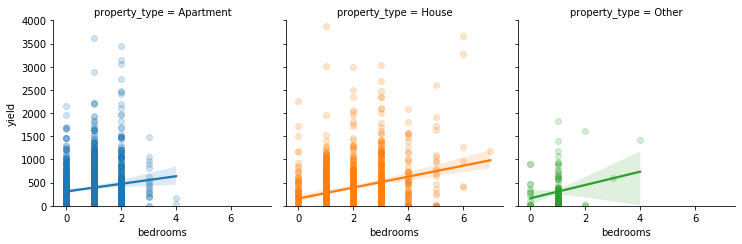

In [186]:
sns.lmplot(x='accommodates', y='yield', data=listings_eda, fit_reg=True, 
           col= 'property_type', hue='property_type', scatter_kws={'alpha':0.2}, height=3.5)
plt.ylim(0,4000)

sns.lmplot(x='bathrooms', y='yield', data=listings_eda, fit_reg=True, 
           col= 'property_type', hue='property_type', scatter_kws={'alpha':0.2}, height=3.5)
plt.ylim(0,4000)

sns.lmplot(x='bedrooms', y='yield', data=listings_eda, fit_reg=True, 
           col= 'property_type', hue='property_type', scatter_kws={'alpha':0.2}, height=3.5)
plt.ylim(0,4000)

plt.show()

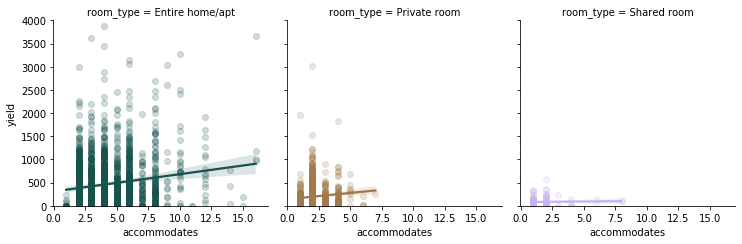

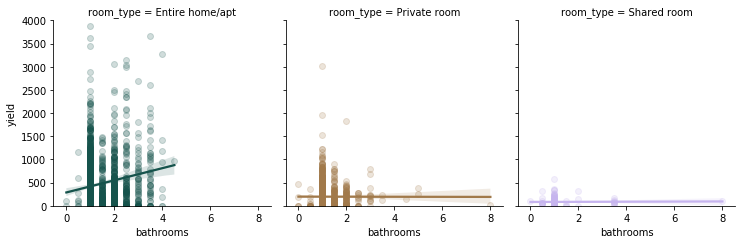

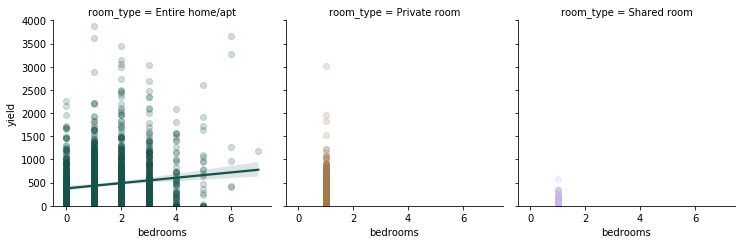

In [187]:
sns.lmplot(x='accommodates', y='yield', data=listings_eda, fit_reg=True,
           col= 'room_type', hue='room_type', scatter_kws={'alpha':0.2}, 
           height=3.5, palette="cubehelix")
plt.ylim(0,4000)

sns.lmplot(x='bathrooms', y='yield', data=listings_eda, fit_reg=True, 
           col= 'room_type', hue='room_type', scatter_kws={'alpha':0.2}, 
           height=3.5, palette="cubehelix")
plt.ylim(0,4000)

sns.lmplot(x='bedrooms', y='yield', data=listings_eda, fit_reg=True, 
           col= 'room_type', hue='room_type', scatter_kws={'alpha':0.2}, 
           height=3.5, palette="cubehelix")
plt.ylim(0,4000)

plt.show()

>> - The plots above indicates in general the better commodious can bring in better yields, such as more bedrooms/bathrooms/accommodates,<br> 
- This positive trend varies among properties type and room type, the this positive trend is even more obvious for different properties type e.g apartment/house/other.

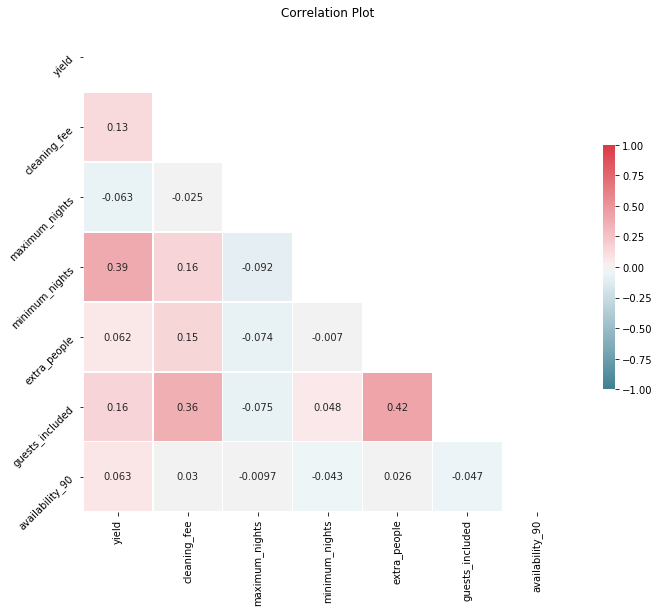

In [188]:
cor_df = pd.DataFrame(listings_eda[['yield', 'cleaning_fee', 'maximum_nights', 'minimum_nights', 'extra_people',
                                    'guests_included','availability_90']])

# Compute the correlation matrix
corr = cor_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.yticks(rotation=45) 
plt.title('Correlation Plot')
plt.show()

>> The `yield` have a correlation with `minimum nights` is about 0.84, the `guests included` has a correlation of 0.36 with `cleaning fee` and a corelation of 0.42 with `extra_people`, the correlation among others are negligible.

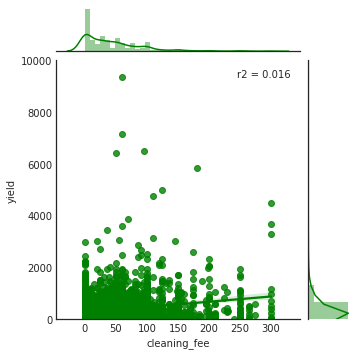

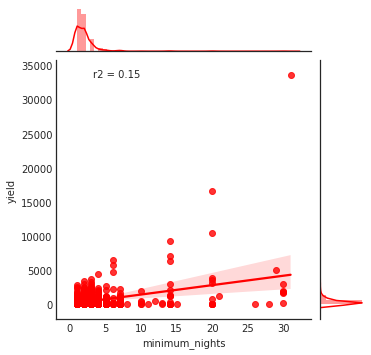

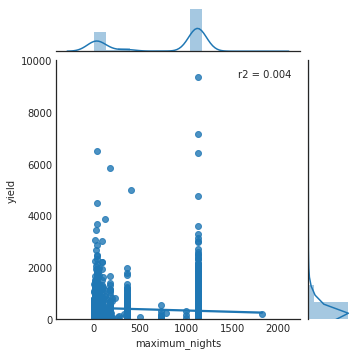

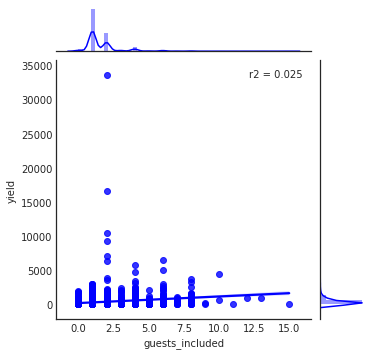

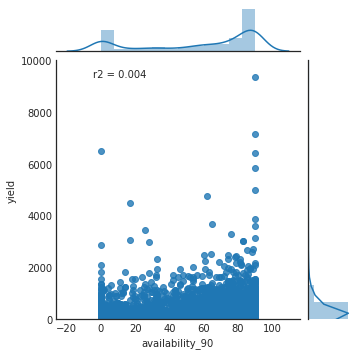

In [189]:
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

with plt.style.context("seaborn-white"):
    sns.jointplot(x='cleaning_fee', y='yield', data = listings_eda, kind="reg", 
                  stat_func=r2, color = 'g', height= 5, ylim=(0,10000))
    sns.jointplot(x='minimum_nights', y='yield', data = listings_eda, kind="reg", 
                  stat_func=r2, color = 'r', height= 5)
    sns.jointplot(x='maximum_nights', y='yield', data = listings_eda, kind="reg", 
                  stat_func=r2, ylim=(0,10000), height= 5)
    sns.jointplot(x='guests_included', y='yield', data = listings_eda, kind="reg", 
                  stat_func=r2, color = 'b', height= 5)
    sns.jointplot(x='availability_90', y='yield', data = listings_eda, kind="reg", 
                  stat_func=r2, ylim=(0,10000), height= 5)

>> the cleaning_fee, guests_included, extra_people, minimum_nights and availability_90 all show weak correlations with the yield, and for minimum_nights, the correlation is intensified by a single data point. Let's take a look at this records.

__Amenities__

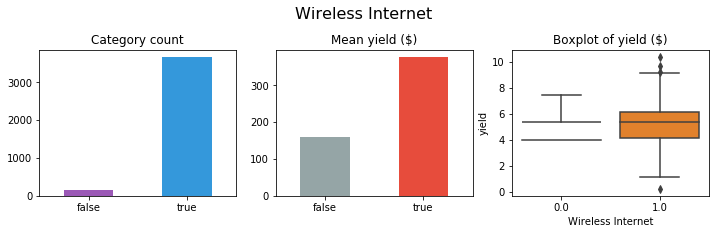

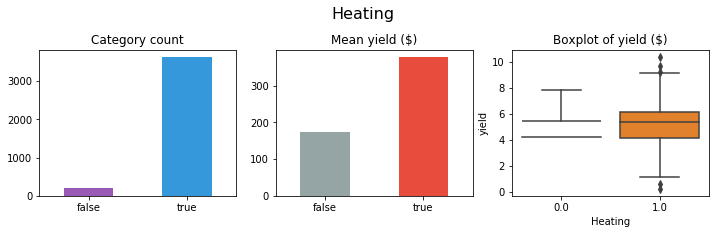

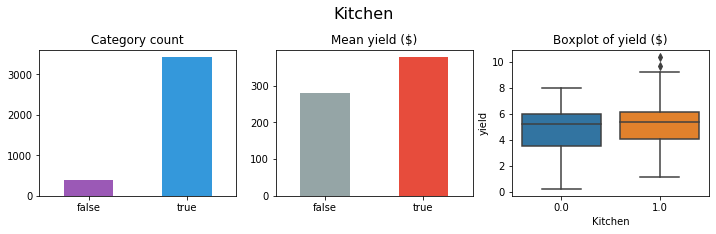

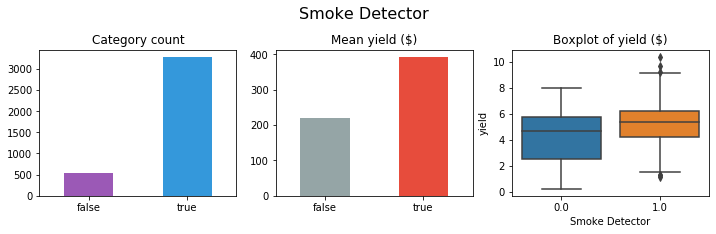

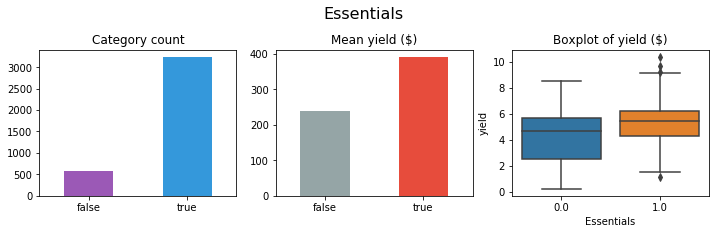

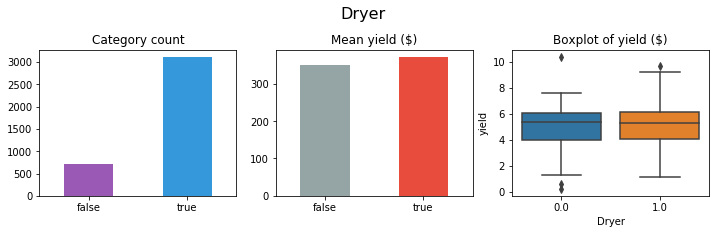

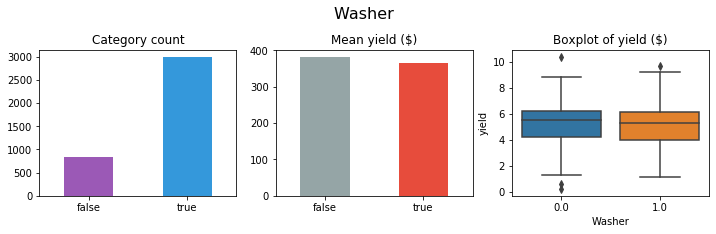

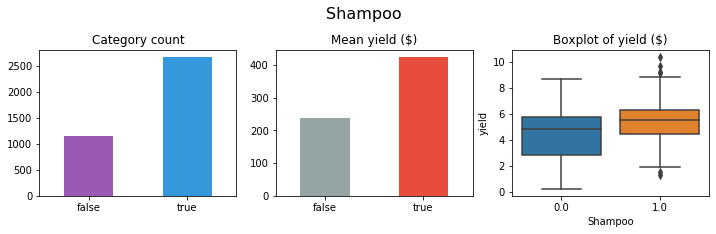

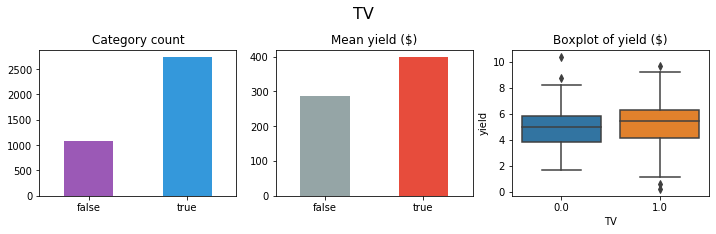

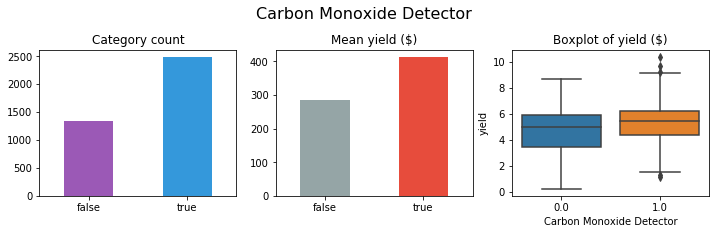

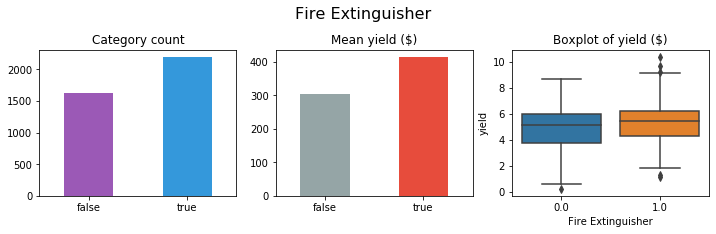

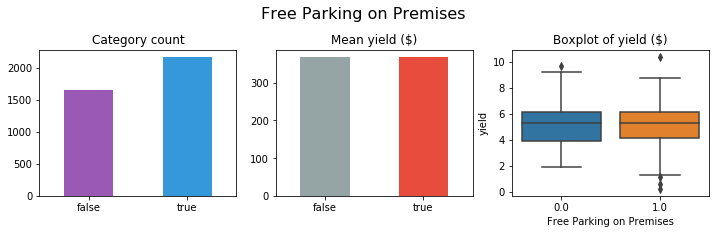

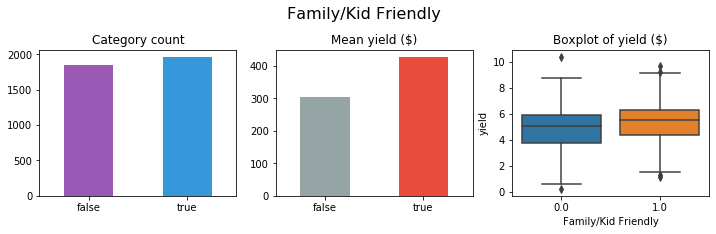

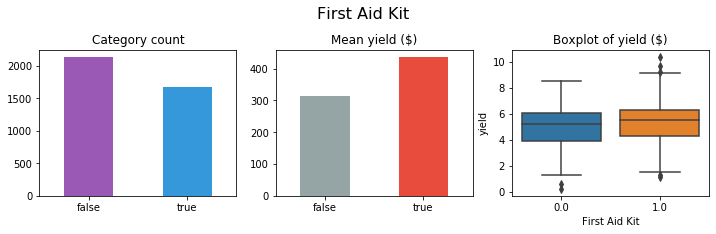

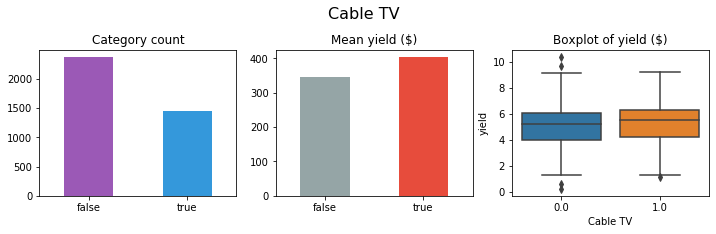

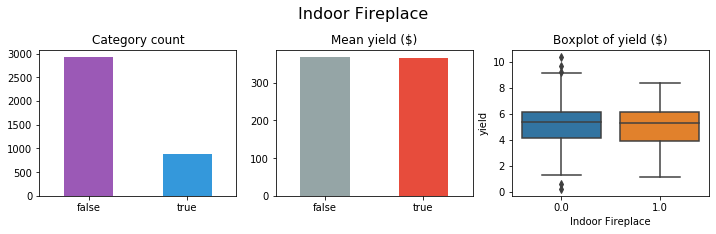

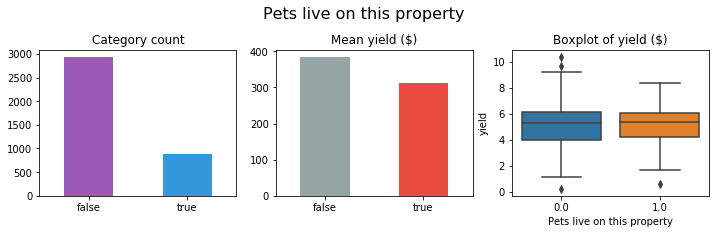

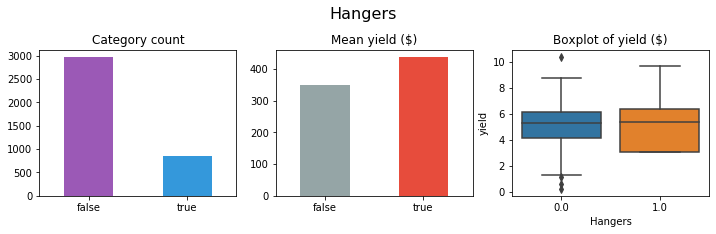

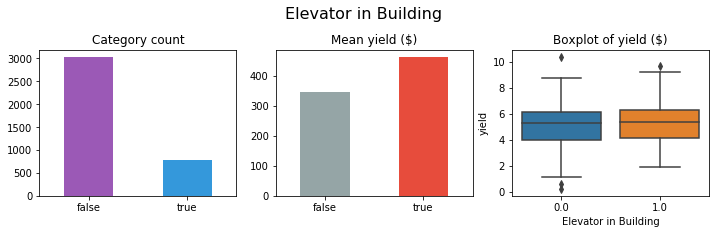

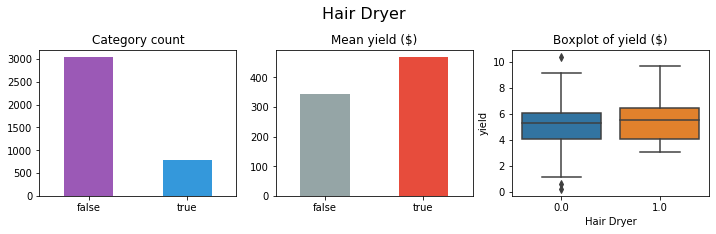

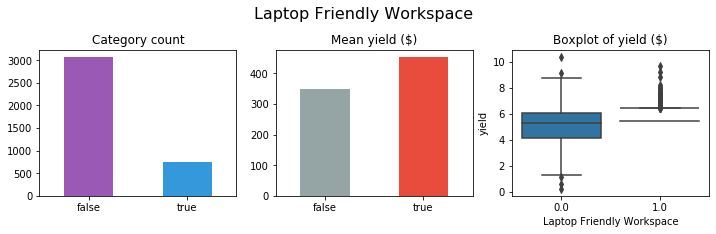

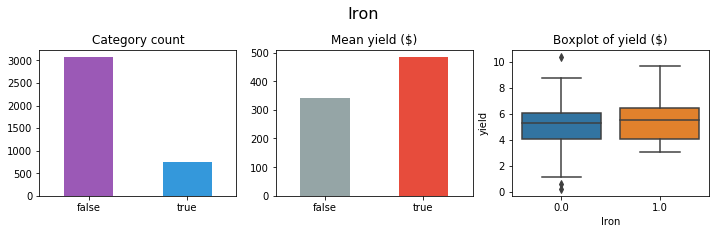

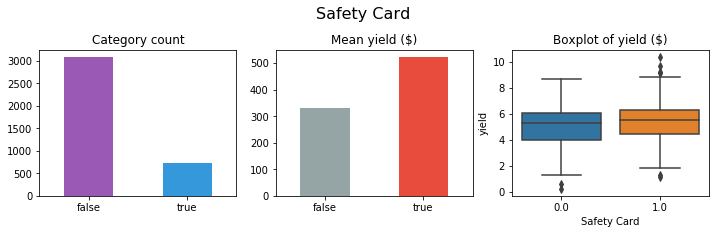

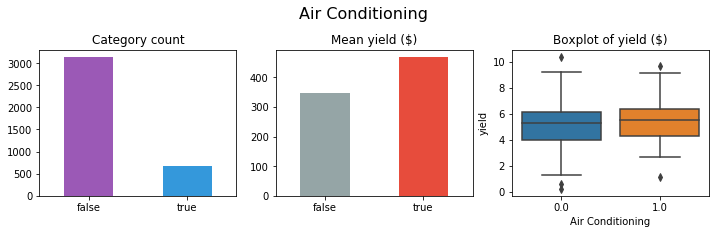

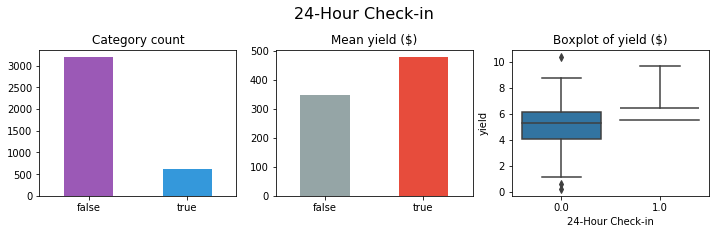

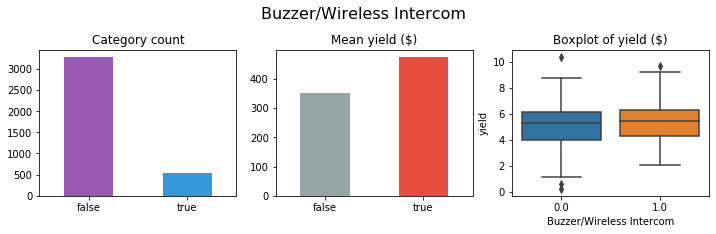

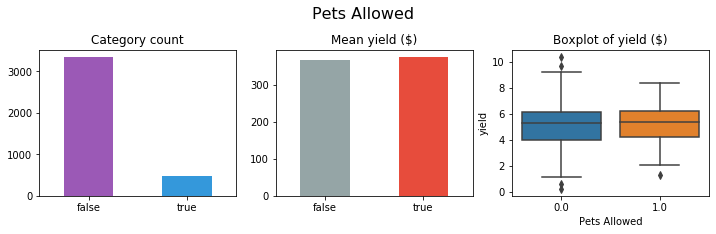

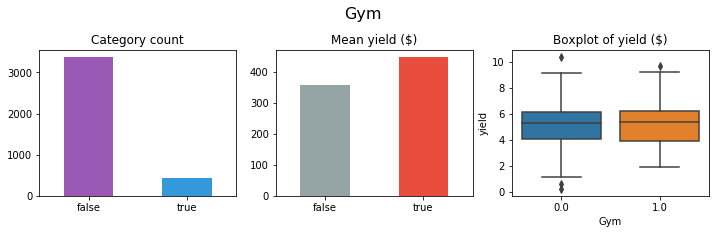

In [190]:
# define the plotting function
def binary_count_and_price_plot(col, figsize=(15,4)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    listings_eda.groupby(col).size().plot(kind='bar', ax=ax1, color=['#9b59b6', '#3498db'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    listings_eda.groupby(col)['yield'].mean().plot(kind='bar', ax=ax2, color=['#95a5a6', '#e74c3c'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Mean yield ($)')
    ax2.set_xlabel('')
    
    sns.boxplot(x=col, y=np.log(listings_eda['yield']), data=listings_eda,  ax=ax3)
    ax3.set_title('Boxplot of yield ($)')

    
    plt.show()

# source the target columns
cols = ['Wireless Internet', 'Heating', 'Kitchen', 'Smoke Detector',
       'Essentials', 'Dryer', 'Washer', 'Shampoo', 'TV',
       'Carbon Monoxide Detector', 'Fire Extinguisher',
       'Free Parking on Premises', 'Family/Kid Friendly', 'First Aid Kit',
       'Cable TV', 'Indoor Fireplace', 'Pets live on this property', 'Hangers',
       'Elevator in Building', 'Hair Dryer', 'Laptop Friendly Workspace',
       'Iron', 'Safety Card', 'Air Conditioning', '24-Hour Check-in',
       'Buzzer/Wireless Intercom', 'Pets Allowed', 'Gym']

# plot the results
for col in listings_eda.loc[:,cols].columns:
    binary_count_and_price_plot(col, figsize=(12,3))   

#### Hypothesis Testing

In [191]:
# define fucntion to draw boostrap sample
def draw_bs_reps(data, func, size):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, len(data)))
    return bs_replicates

# define fucntion to bootstaps two sample test
def bootstrap_two_sample_test(df, col):
    # Compute mean of all forces: mean_force
    mean = np.mean(df['yield'])
    data_a = df[df[col] == 1]['yield']
    data_b = df[df[col] == 0]['yield']
    empirical_diff_means = np.mean(data_b) - np.mean(data_a)
    # Generate shifted arrays
    a_shifted = data_a - np.mean(data_a) + mean
    b_shifted = data_b - np.mean(data_b) + mean 

    # Compute 10,000 bootstrap replicates from shifted arrays
    bs_replicates_a = draw_bs_reps(a_shifted, np.mean, 10000)
    bs_replicates_b = draw_bs_reps(b_shifted, np.mean, 10000)

    # Get replicates of difference of means: bs_replicates
    bs_replicates = bs_replicates_b - bs_replicates_a 

    # Compute and print p-value: p
    p = np.sum(bs_replicates > empirical_diff_means) / len(bs_replicates)
    return p

In [192]:
# perform test
print("Bootstrap hypothesis test for difference of means yield: \n")
for col in cols:
    p = bootstrap_two_sample_test(listings_eda, col)
    print(col, "p-value = {}".format(p))

Bootstrap hypothesis test for difference of means yield: 

Wireless Internet p-value = 1.0
Heating p-value = 1.0
Kitchen p-value = 1.0
Smoke Detector p-value = 1.0
Essentials p-value = 1.0
Dryer p-value = 0.6238
Washer p-value = 0.3084
Shampoo p-value = 1.0
TV p-value = 1.0
Carbon Monoxide Detector p-value = 1.0
Fire Extinguisher p-value = 0.9998
Free Parking on Premises p-value = 0.5333
Family/Kid Friendly p-value = 1.0
First Aid Kit p-value = 0.9999
Cable TV p-value = 0.9945
Indoor Fireplace p-value = 0.4504
Pets live on this property p-value = 0.001
Hangers p-value = 0.993
Elevator in Building p-value = 0.9974
Hair Dryer p-value = 0.9997
Laptop Friendly Workspace p-value = 0.9956
Iron p-value = 0.9996
Safety Card p-value = 0.9965
Air Conditioning p-value = 0.9983
24-Hour Check-in p-value = 0.9976
Buzzer/Wireless Intercom p-value = 0.9897
Pets Allowed p-value = 0.6311
Gym p-value = 0.9465


>> In general, we expect the amenities can lead to better yield! Actually, not every single item contributes to a higher average yield when it is available.
<br> - With wifi, heating, smoke detector, essentials, and gym, etc., the listing can make more money,
<br> - The washer, pets allowed listings have the similar yield with those don't have that;
<br> - And the pet living in the properties seems to be a negative factor for customers to choose the listing to stay.
<br> - The hypothesis testing results show there's an only statistically significant difference in mean yield for the `Pets live on this property` or not.

## Listing Accommodate & Facilities Summary

>Now we have explored how Listing Accommodate & Facilities can influence the `yield`:
<br>  - In general, the better commodious can bring in better yields;
<br>  - The cleaning_fee, extra_people, minimum_nights and availability show weak correlations with the yield;
<br>  - A substantial amount of amenities contribute to a higher average yield but that cannot apply to every single item.

## 3.4 `Interavtive Relationshiop`
<a id="Ir"></a> 
<br> Can the interaction between the hosts and customers influence the yield? let's exam from both hosts' and customers' perspectives.

### 3.4.1 From Hosts' Side

__1. host response__

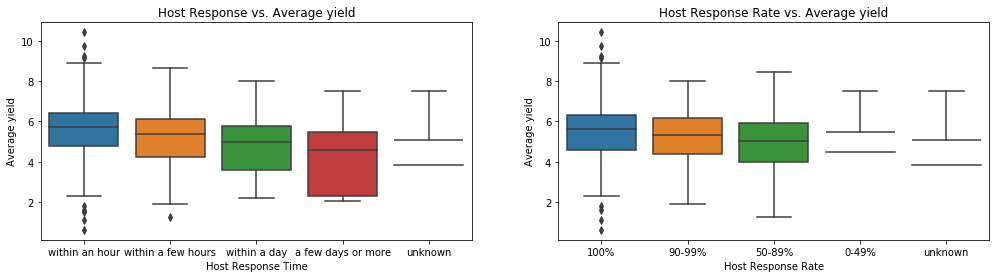

host response time summary
                     count        mean          std
a few days or more    38.0  199.332105   331.889343
unknown              523.0  141.033308   243.026793
within a day         597.0  241.611089   327.624285
within a few hours   968.0  357.319948   497.744157
within an hour      1692.0  492.510715  1095.857022
host response rate summary
          count        mean         std
0-49%      90.0  181.413667  271.428115
100%     2371.0  444.785086  960.116835
50-89%    584.0  297.125205  454.922015
90-99%    250.0  346.385960  416.573696
unknown   523.0  141.033308  243.026793


In [193]:
# plot the yield
f, axes = plt.subplots(1, 2, figsize=(17,4))
sns.boxplot(x="host_response_time", y=np.log(listings_eda['yield']), 
            data=listings_eda,  ax=axes[0], 
            order = ['within an hour', 'within a few hours', 'within a day', 'a few days or more', 'unknown'])
axes[0].set_title('Host Response vs. Average yield')
axes[0].set_xlabel('Host Response Time')
axes[0].set_ylabel('Average yield')

sns.boxplot(x="host_response_rate", y=np.log(listings_eda['yield']), 
            data=listings_eda,  ax=axes[1],
            order = ['100%', '90-99%', '50-89%', '0-49%', 'unknown'])
axes[1].set_title('Host Response Rate vs. Average yield')
axes[1].set_xlabel('Host Response Rate')
axes[1].set_ylabel('Average yield')
plt.show()

host_response = listings_eda[['host_response_time', 'host_response_rate', 'yield']]
host_response_time_summary = pd.DataFrame(group.describe().rename(columns={'yield':name}).squeeze()for name, group in host_response.groupby('host_response_time'))
host_response_rate_summary = pd.DataFrame(group.describe().rename(columns={'yield':name}).squeeze()for name, group in host_response.groupby('host_response_rate'))
print("host response time summary\n{}".format(host_response_time_summary.iloc[:,[0,1,2]]))
print("host response rate summary\n{}".format(host_response_rate_summary.iloc[:,[0,1,2]]))

>> The plot indicates the host response might have improved the yield.
<br> - A slightly trend of the faster the hosts get back to the customer, the more money they can make!
<br> - A slightly trend of the higher response rate also suggests the positive results!

__2. Cancellation Policy__

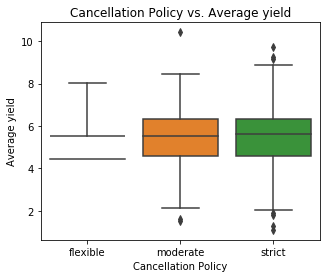

In [194]:
plt.figure(figsize=(5,4))
sns.boxplot(x="cancellation_policy", y=np.log(listings_eda['yield']), data=listings_eda,
            order = ['flexible', 'moderate', 'strict'])
plt.title('Cancellation Policy vs. Average yield')
plt.xlabel('Cancellation Policy')
plt.ylabel('Average yield')
plt.show()

>> It seems flexible cancellation does not guarantee better gain.

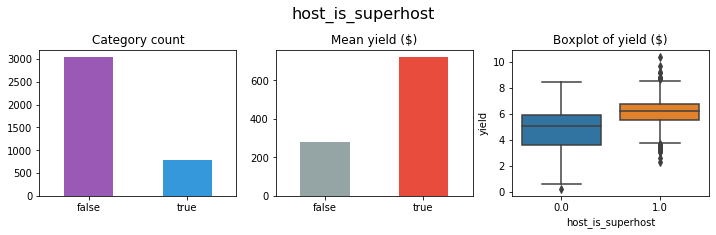

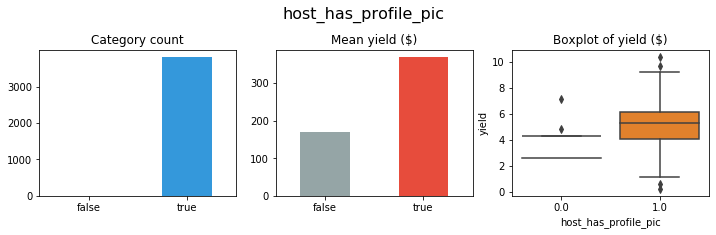

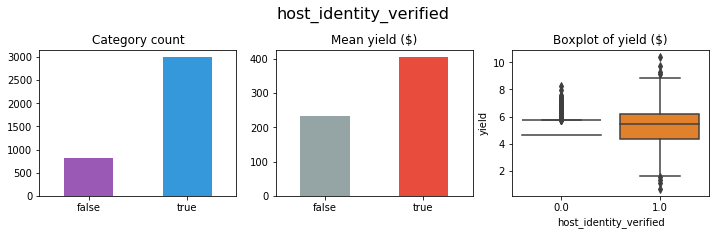

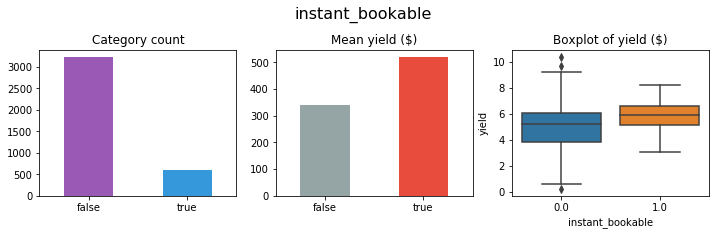

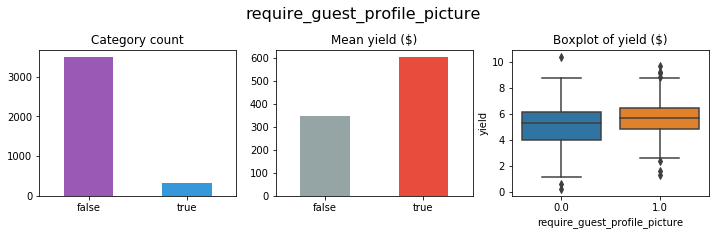

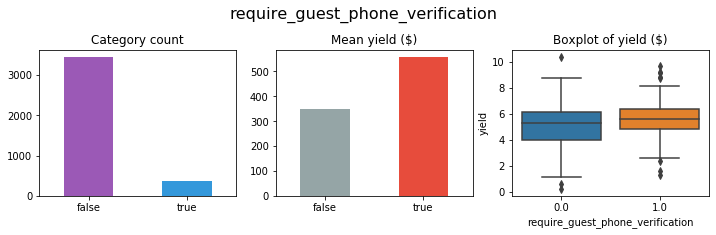

In [195]:
# plot the results
cols_h = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified','instant_bookable', 
          'require_guest_profile_picture', 'require_guest_phone_verification']
for col in listings_eda.loc[:,cols_h].columns:
    binary_count_and_price_plot(col, figsize=(12,3))

##### Hypothesis Testing 

In [196]:
# perform test
print("Bootstrap hypothesis test for difference of means yield: \n")
for col in cols_h:
    p = bootstrap_two_sample_test(listings_eda, col)
    print(col, "p-value = {}".format(p))
    

Bootstrap hypothesis test for difference of means yield: 

host_is_superhost p-value = 1.0
host_has_profile_pic p-value = 0.9996
host_identity_verified p-value = 1.0
instant_bookable p-value = 1.0
require_guest_profile_picture p-value = 0.9973
require_guest_phone_verification p-value = 0.9972


>> Further, 
<br> - The super hosts, the hosts have a picture and if they have their identifies, they can keep more customers and earn more money.
<br> - All these interactions have a positive impact on the yield.
<br> - However, the bootstrap hypothesis testing favors the null hypothesis: there is no difference between mean yield among these factors.

### 3.4.2 From Customers' Side

__Review Score__

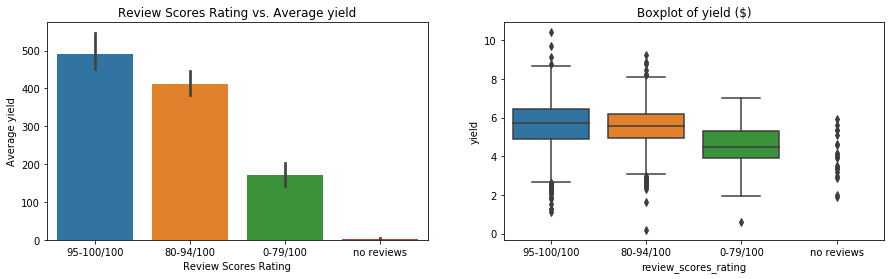

In [197]:
# Plot the review_scores_rating with score 0-100
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))

sns.barplot(x="review_scores_rating", y="yield", data=listings_eda, estimator=np.mean, ax=ax1,
            order = ['95-100/100', '80-94/100', '0-79/100', 'no reviews'])
ax1.set_title('Review Scores Rating vs. Average yield')
ax1.set_xlabel('Review Scores Rating')
ax1.set_ylabel('Average yield')

sns.boxplot(x="review_scores_rating", y=np.log(listings_eda['yield']), data=listings_eda,  ax=ax2,
           order = ['95-100/100', '80-94/100', '0-79/100', 'no reviews'])
ax2.set_title('Boxplot of yield ($)')
plt.show()

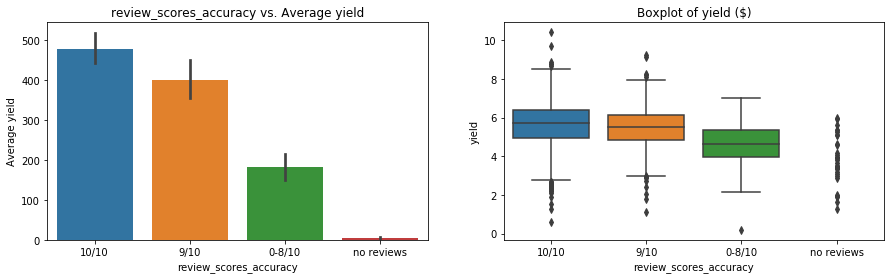

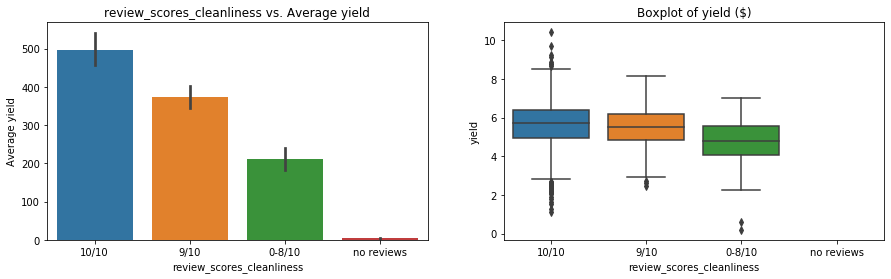

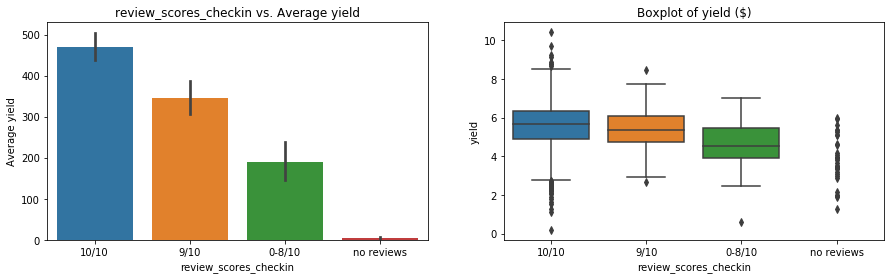

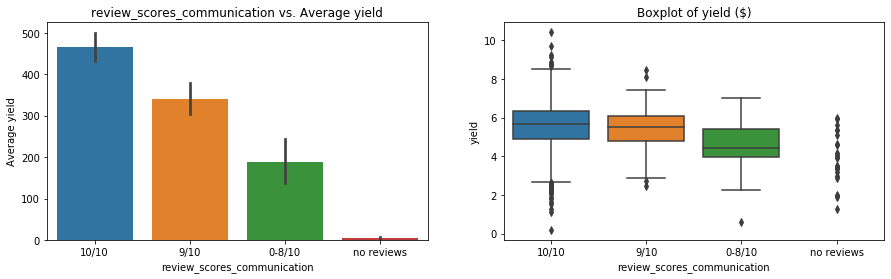

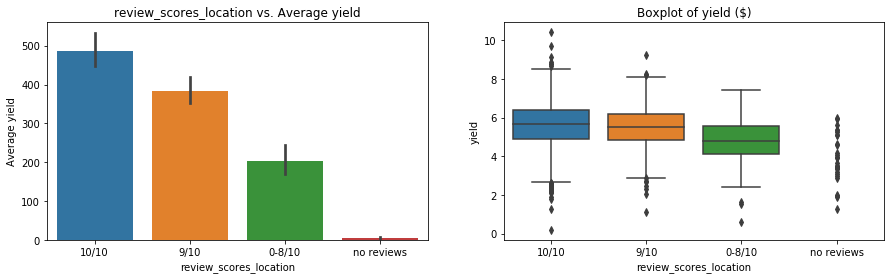

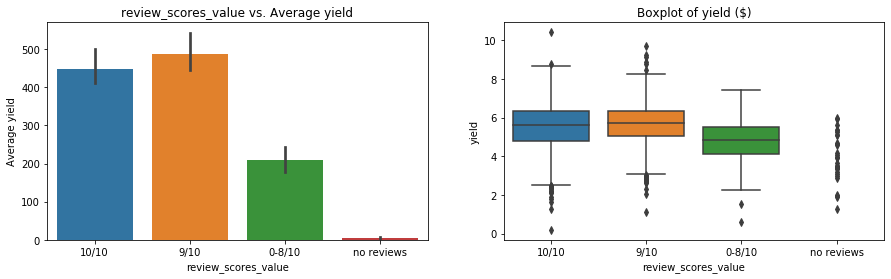

In [198]:
# creat list for group score with 0-10
score_col = ['review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
             'review_scores_communication', 'review_scores_location','review_scores_value']

# plot the results
for col in score_col:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4)) 
    sns.barplot(x=listings_eda[col], y="yield", data=listings_eda, estimator=np.mean, ax= ax1,
                order = ['10/10', '9/10', '0-8/10', 'no reviews'])
    ax1.set_title( col + ' vs. Average yield')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Average yield')
    
    sns.boxplot(x=col, y=np.log(listings_eda['yield']), data=listings_eda, ax=ax2, 
    order = ['10/10', '9/10', '0-8/10', 'no reviews'])
    ax2.set_title('Boxplot of yield ($)')
                                   
                                   
    plt.show()
                                

>> Unsurprisingly, all the review score shows the pattern that higher rating suggests better yield.

## Interavtive Relationshiop Summary

>In general, The interavtive relationshiop between hosts and customers suggest a positive improvement towards yield.
<br> - The more response the hosts do, they can obtain better gain;
<br> - The customers leavs better rating also promte that too.   

## 3.5 `Geographical Information`
<a id="Gi"></a> 
<br> Geographical location is a very important factor both for managing a listing and choosing a place to stay! We are excited about to see how that'll work!

In [199]:
def generateBaseMap(default_location=[47.623601, -122.328874], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

#### Geographical Pattern for Average Yield

In [200]:
# Heatmap for yield grouped by geographical location
base_map_yield = generateBaseMap()
HeatMap(data=listings_eda[['latitude', 'longitude', 'yield']].groupby(['latitude', 'longitude']).median().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map_yield)
base_map_yield

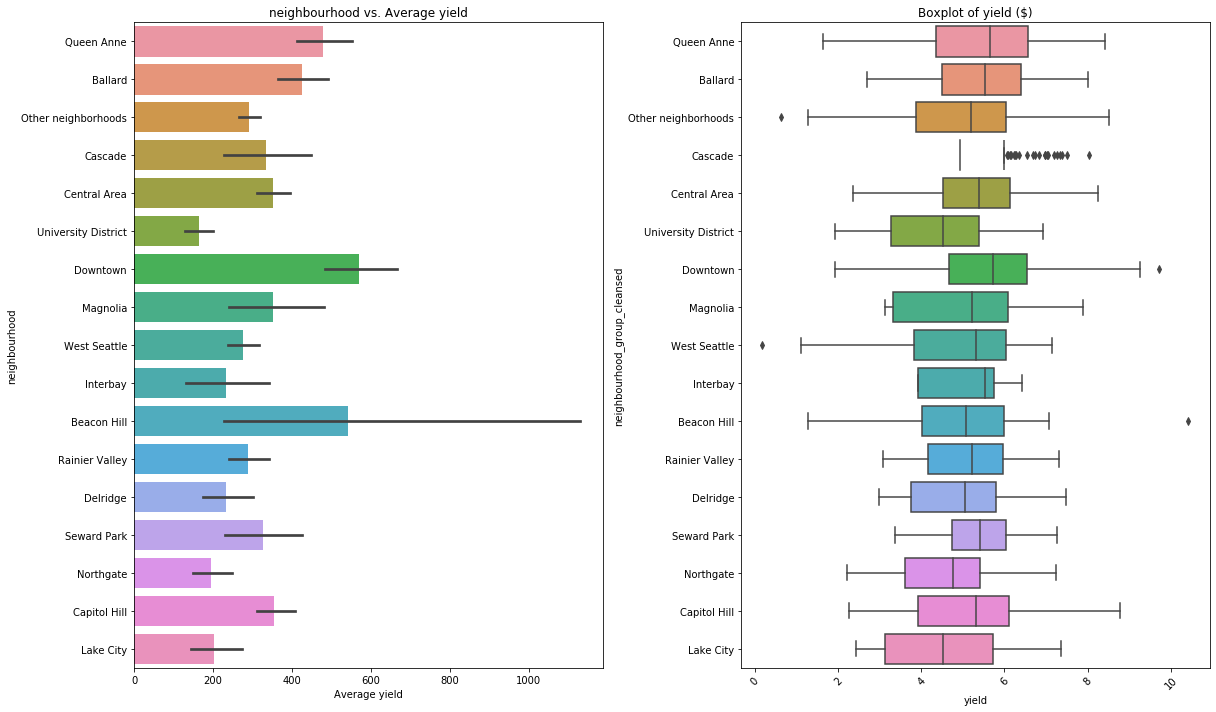

In [201]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,10))
plt.xticks(rotation=45) 

sns.barplot(y="neighbourhood_group_cleansed", x="yield", data=listings_eda, estimator=np.mean, ax=ax1)
ax1.set_title('neighbourhood vs. Average yield')
ax1.set_ylabel('neighbourhood')
ax1.set_xlabel('Average yield')

sns.boxplot(y="neighbourhood_group_cleansed", x=np.log(listings_eda['yield']), data=listings_eda,  ax=ax2)
ax2.set_title('Boxplot of yield ($)')

#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=65)
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [202]:
neighbourhood = listings_eda[['neighbourhood_group_cleansed', 'yield']]
neighbourhood_summary = pd.DataFrame(group.describe().rename(columns={'yield':name}).squeeze()for name, group in neighbourhood.groupby('neighbourhood_group_cleansed'))
print("neighbourhood summary\n{}".format(neighbourhood_summary.iloc[:,[0,1,2]]))

neighbourhood summary
                     count        mean          std
Ballard              230.0  424.514304   486.266753
Beacon Hill          118.0  542.838220  3080.851254
Capitol Hill         567.0  353.443951   564.944634
Cascade               89.0  334.650112   510.198978
Central Area         369.0  350.770244   411.614247
Delridge              79.0  232.326456   293.322760
Downtown             530.0  570.198038  1122.529703
Interbay              11.0  232.410000   198.245370
Lake City             67.0  201.243284   271.986375
Magnolia              61.0  350.707705   512.862571
Northgate             80.0  195.325250   245.767343
Other neighborhoods  794.0  292.232821   369.172339
Queen Anne           295.0  479.360441   600.961830
Rainier Valley       159.0  287.951761   314.058378
Seward Park           44.0  325.928182   327.955986
University District  122.0  164.967541   199.457685
West Seattle         203.0  276.667734   279.788176


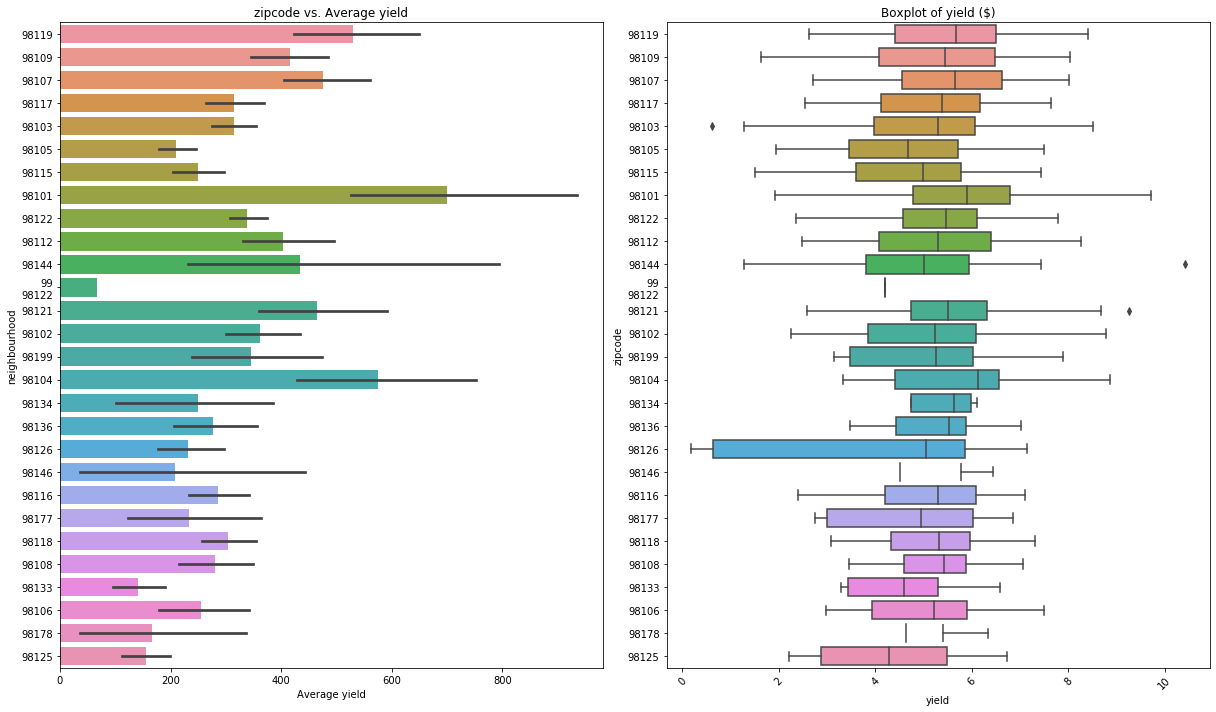

In [203]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,10))
plt.xticks(rotation=45) 

sns.barplot(y="zipcode", x="yield", data=listings_eda, estimator=np.mean, ax=ax1)
ax1.set_title('zipcode vs. Average yield')
ax1.set_ylabel('neighbourhood')
ax1.set_xlabel('Average yield')

sns.boxplot(y="zipcode", x=np.log(listings_eda['yield']), data=listings_eda,  ax=ax2)
ax2.set_title('Boxplot of yield ($)')

#plt.setp(ax1.xaxis.get_majorticklabels(), rotation=65)
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.show()

In [204]:
listings_eda.zipcode.value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98134          5
98146          5
99\n98122      1
Name: zipcode, dtype: int64

## Geographical Information Summary

>The average yield that grouped by neighborhood indicate the central area - downtown, Queen Anne and Ballard obtain the best yield among other areas, whereas the university district and lake city have the least - which make sense, the central area is closer to the mall, bar and any entertainment and bring in the better yields.
<br>

## 4. Summary 
<a id = "sum"></a>
We are done with our exploratory data analysis, and we will wrap up the exploratory data analysis and data storytelling by writing a cleaned data as final dataset for modeling, which will be used for the data modeling as nest step. 

In [205]:
# Define a drop function for repeatitive use
def drop(data, feat):
    """
    drop feature from data
    """
    new_data = data.drop(feat, axis=1)
    print('Dropping {}...'.format(feat))
    return new_data


## Drop Freatured kept for EDA
EDA_drop = ['host_id', 'host_since', 'zipcode', 'weekly_price', 'latitude', 'longitude', 
            'minimum_nights', 'reviews_per_month', 'price', 'first_review', 'last_review']

for feat in listings_eda.columns:
    if feat in EDA_drop:
        listings_eda = drop(listings_eda, feat)

## Write the cleaned data
listings_eda.to_csv("listings_clean_model.csv", index=False)

Dropping host_id...
Dropping host_since...
Dropping zipcode...
Dropping latitude...
Dropping longitude...
Dropping price...
Dropping minimum_nights...
Dropping first_review...
Dropping last_review...
Dropping reviews_per_month...
